In [1]:
import tensorflow as tf

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

In [26]:
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


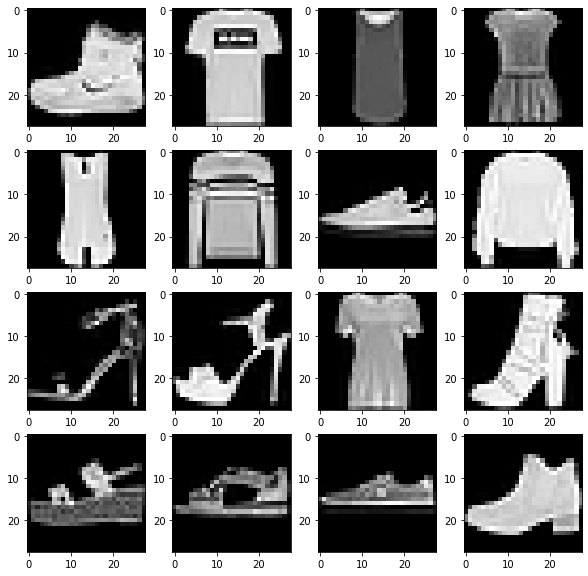

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [5]:
import matplotlib.pyplot as plt
# 전체 그래프의 크기를 width=10, height=10으로 지정합니다.
plt.figure(figsize=(10,10))
for c in range(16):
    # 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')

plt.show()

# 훈련 데이터의 첫 번째 - 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [7]:
# 컨볼루션 레이어
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_1 (Dense)             (None, 128)               3965056   
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Tr

2022-01-02 14:52:42.604474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-02 14:52:42.605454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

2022-01-02 15:12:49.811559: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-02 15:12:49.999172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
1407/1407 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.8340

2022-01-02 15:13:09.091335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 23s 16ms/step - loss: 0.4731 - accuracy: 0.8340 - val_loss: 0.3722 - val_accuracy: 0.8642
Epoch 2/25
1407/1407 [==============================] - 22s 16ms/step - loss: 0.3363 - accuracy: 0.8752 - val_loss: 0.3877 - val_accuracy: 0.8610
Epoch 3/25
1407/1407 [==============================] - 22s 16ms/step - loss: 0.2861 - accuracy: 0.8945 - val_loss: 0.3727 - val_accuracy: 0.8717
Epoch 4/25
1407/1407 [==============================] - 22s 16ms/step - loss: 0.2433 - accuracy: 0.9101 - val_loss: 0.3849 - val_accuracy: 0.8683
Epoch 5/25
1407/1407 [==============================] - 23s 17ms/step - loss: 0.2090 - accuracy: 0.9224 - val_loss: 0.4449 - val_accuracy: 0.8685
Epoch 6/25
1407/1407 [==============================] - 25s 18ms/step - loss: 0.1841 - accuracy: 0.9316 - val_loss: 0.4890 - val_accuracy: 0.8699
Epoch 7/25
1407/1407 [==============================] - 25s 18ms/step - loss: 0.1648 - accuracy: 0.9398 - val_loss: 0.5087 - val_accura

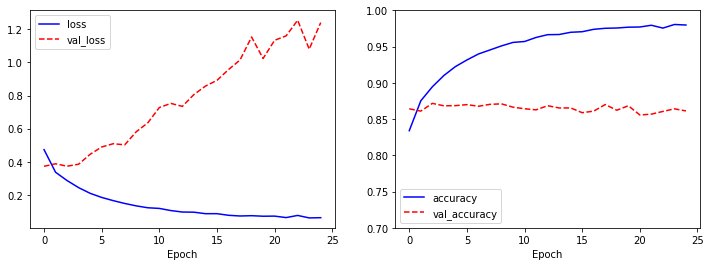

[1.339311957359314, 0.8579000234603882]

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [11]:
# 컨볼루션 레이어, 풀링레이어, 드롭아웃 레이어 추가
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [12]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25


2022-01-02 15:37:21.150937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.8121

2022-01-02 15:37:32.835250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 13s 9ms/step - loss: 0.5159 - accuracy: 0.8121 - val_loss: 0.4065 - val_accuracy: 0.8489
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3480 - accuracy: 0.8735 - val_loss: 0.3389 - val_accuracy: 0.8736
Epoch 3/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3054 - accuracy: 0.8885 - val_loss: 0.3176 - val_accuracy: 0.8828
Epoch 4/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2778 - accuracy: 0.8984 - val_loss: 0.3092 - val_accuracy: 0.8852
Epoch 5/25
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2571 - accuracy: 0.9060 - val_loss: 0.2946 - val_accuracy: 0.8931
Epoch 6/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2354 - accuracy: 0.9137 - val_loss: 0.2858 - val_accuracy: 0.8976
Epoch 7/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2195 - accuracy: 0.9182 - val_loss: 0.2967 - val_accuracy: 0.

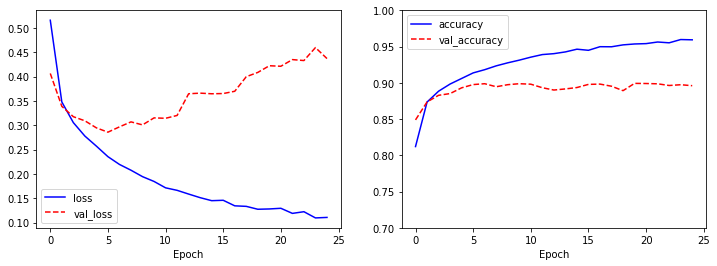

[0.4560977816581726, 0.8976000547409058]

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [14]:
# VGGNet 스타일의 Fashion MNIST 분류를 위한 컨볼루션 신경망 모델
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [15]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25


2022-01-02 16:12:15.746315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 0.5674 - accuracy: 0.7886

2022-01-02 16:12:51.560559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 40s 28ms/step - loss: 0.5674 - accuracy: 0.7886 - val_loss: 0.3383 - val_accuracy: 0.8767
Epoch 2/25
1407/1407 [==============================] - 39s 28ms/step - loss: 0.3353 - accuracy: 0.8778 - val_loss: 0.2748 - val_accuracy: 0.9031
Epoch 3/25
1407/1407 [==============================] - 40s 28ms/step - loss: 0.2974 - accuracy: 0.8913 - val_loss: 0.2531 - val_accuracy: 0.9128
Epoch 4/25
1407/1407 [==============================] - 40s 28ms/step - loss: 0.2775 - accuracy: 0.8983 - val_loss: 0.2413 - val_accuracy: 0.9122
Epoch 5/25
1407/1407 [==============================] - 40s 29ms/step - loss: 0.2630 - accuracy: 0.9043 - val_loss: 0.2424 - val_accuracy: 0.9104
Epoch 6/25
1407/1407 [==============================] - 40s 29ms/step - loss: 0.2517 - accuracy: 0.9094 - val_loss: 0.2219 - val_accuracy: 0.9207
Epoch 7/25
1407/1407 [==============================] - 40s 29ms/step - loss: 0.2424 - accuracy: 0.9115 - val_loss: 0.2224 - val_accura

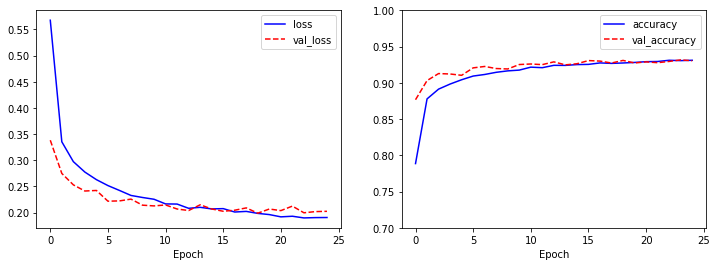

[0.21651668846607208, 0.9251000285148621]

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

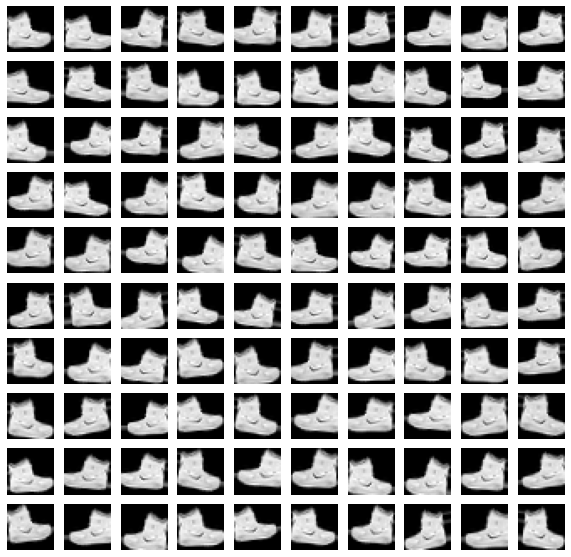

In [17]:
# 이미지 보강
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
    )

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),
                                  np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
plt.figure(figsize=(10,10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
    
plt.show()

In [27]:
# 실제 이미지 보강
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
    )

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                  batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [29]:
# VGGNet Style 네트워크 + 이미지 보강학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32,
                          padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
   1/2110 [..............................] - ETA: 10:36 - loss: 2.2571 - accuracy: 0.1562

2022-01-02 17:30:19.790836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2110/2110 [==============================] - ETA: 0s - loss: 0.5533 - accuracy: 0.7948

2022-01-02 17:31:12.409013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2110/2110 [==============================] - 59s 28ms/step - loss: 0.5533 - accuracy: 0.7948 - val_loss: 0.5930 - val_accuracy: 0.7853
Epoch 2/25
2110/2110 [==============================] - 60s 28ms/step - loss: 0.3489 - accuracy: 0.8711 - val_loss: 0.5229 - val_accuracy: 0.8065
Epoch 3/25
2110/2110 [==============================] - 62s 29ms/step - loss: 0.3134 - accuracy: 0.8862 - val_loss: 0.4669 - val_accuracy: 0.8292
Epoch 4/25
2110/2110 [==============================] - 60s 29ms/step - loss: 0.2882 - accuracy: 0.8937 - val_loss: 0.4449 - val_accuracy: 0.8392
Epoch 5/25
2110/2110 [==============================] - 64s 30ms/step - loss: 0.2720 - accuracy: 0.9001 - val_loss: 0.4158 - val_accuracy: 0.8497
Epoch 6/25
2110/2110 [==============================] - 64s 30ms/step - loss: 0.2614 - accuracy: 0.9052 - val_loss: 0.4044 - val_accuracy: 0.8566
Epoch 7/25
2110/2110 [==============================] - 65s 31ms/step - loss: 0.2542 - accuracy: 0.9077 - val_loss: 0.3909 - val_accura

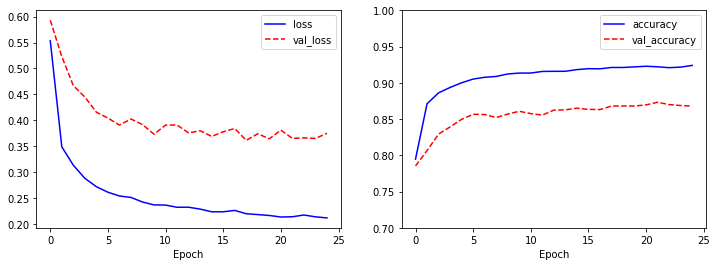

[0.20849354565143585, 0.9282000660896301]

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)